In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install lux

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.8 MB/s eta 0:00:00
  Created wheel for lux: filename=lux-0.5.1-py3-none-any.whl size=11961 sha256=29d62ace0abe537db42886361b2d5e9eb64d012023f25aa7912ae028fc821bb4
  Stored in directory: /root/.cache/pip/wheels/e8/23/56/ad9393d57959f25ca5a7d6e55cb280cd1f9affbc987e2fbd26
  Created wheel for lux-api: filename=lux_api-0.5.1-py3-none-any.whl size=185603 sha256=2d70a084161488b913300d66d54ca7db2a72a8345528fb79a20f607d8591996e
  Stored in directory: /root/.cache/pip/wheels/29/2f/f5/d5fcd311

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os,sys
import lux

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [ ]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import seaborn as sns
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
df_train = pd.read_csv('kidney_disease_train.csv')

df_test = pd.read_csv('kidney_disease_test.csv')

In [ ]:
df_train

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,42.0,1.7,136.0,4.7,12.6,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,50.1,1.9,NaN,NaN,11.7,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,87.0,5.2,139.0,3.7,12.1,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,25.0,1.0,144.0,5.0,17.8,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,NaN,50.0,1.4,129.0,4.0,11.1,39.0,8300,4.6,yes,no,no,poor,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,163.0,92.0,3.3,141.0,4.0,9.8,28.0,14600,3.2,yes,yes,no,good,no,no,ckd
276,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,89.0,118.0,6.1,127.0,4.4,6.0,17.0,6500,NaN,yes,yes,no,good,yes,yes,ckd
277,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,111.0,34.0,1.1,145.0,4.0,14.3,41.0,7200,5.0,no,no,no,good,no,no,notckd
278,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,99.0,19.0,0.5,147.0,3.5,13.6,44.0,7300,6.4,no,no,no,good,no,no,notckd


In [ ]:
df = pd.concat([df_train, df_test])
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,42.0,1.7,136.0,4.7,12.6,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,50.1,1.9,NaN,NaN,11.7,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,87.0,5.2,139.0,3.7,12.1,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,25.0,1.0,144.0,5.0,17.8,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,NaN,50.0,1.4,129.0,4.0,11.1,39.0,8300,4.6,yes,no,no,poor,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,60,67.0,90.0,1.020,1.0,0.0,NaN,abnormal,present,notpresent,141.0,66.0,3.2,138.0,6.6,NaN,NaN,NaN,NaN,yes,no,no,good,no,no,NaN
116,79,56.0,80.0,1.010,1.0,0.0,NaN,normal,notpresent,notpresent,165.0,55.0,1.8,NaN,NaN,13.5,40,11800.0,5.0,yes,yes,no,poor,yes,no,NaN
117,285,66.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,94.0,19.0,0.7,135.0,3.9,16.0,41,5300.0,5.9,no,no,no,good,no,no,NaN
118,305,41.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,122.0,25.0,0.8,138.0,5.0,17.1,41,9100.0,5.2,no,no,no,good,no,no,NaN


In [ ]:
!pip install pandas_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0b70308713aa693431701c2c4dd9559b0a89b2702e21aa9d74b011921214e72c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
Index: 400 entries, 0 to 119
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


In [ ]:
df.shape

(400, 26)

In [ ]:
#Create a list of columns to retain
retain = ["sg", "age","bp","al", "su","sc", "hemo","pcv", "wbcc", "rbcc", "htn", "classification"]

#retain = df.columns, Drop the columns that are not in retain
df = df.drop([col for col in df.columns if not col in retain], axis=1)

# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [ ]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
check_df(df)

##################### Shape #####################
(187, 10)
##################### Types #####################
age               float64
bp                float64
sg                float64
al                float64
su                float64
sc                float64
hemo              float64
pcv                object
htn                object
classification     object
dtype: object
##################### NA #####################
age               0
bp                0
sg                0
al                0
su                0
sc                0
hemo              0
pcv               0
htn               0
classification    0
dtype: int64


In [ ]:
# Convert 'classification' column to string type before plotting
df['classification'] = df['classification'].astype(str)


In [ ]:
print(df['classification'].dtype)

object


IndexError: Requested axis not found in manager

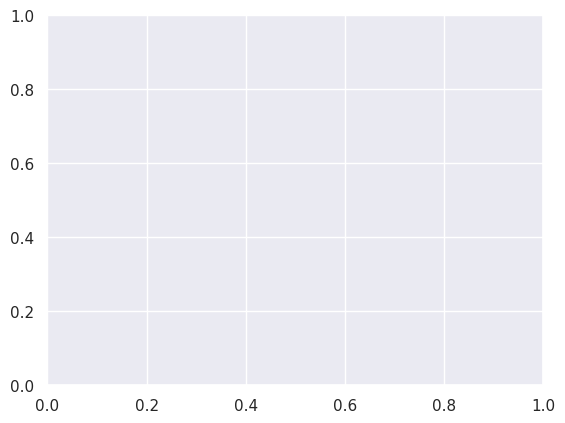

In [ ]:
sns.countplot(df['classification'],label="Count")

<Axes: >

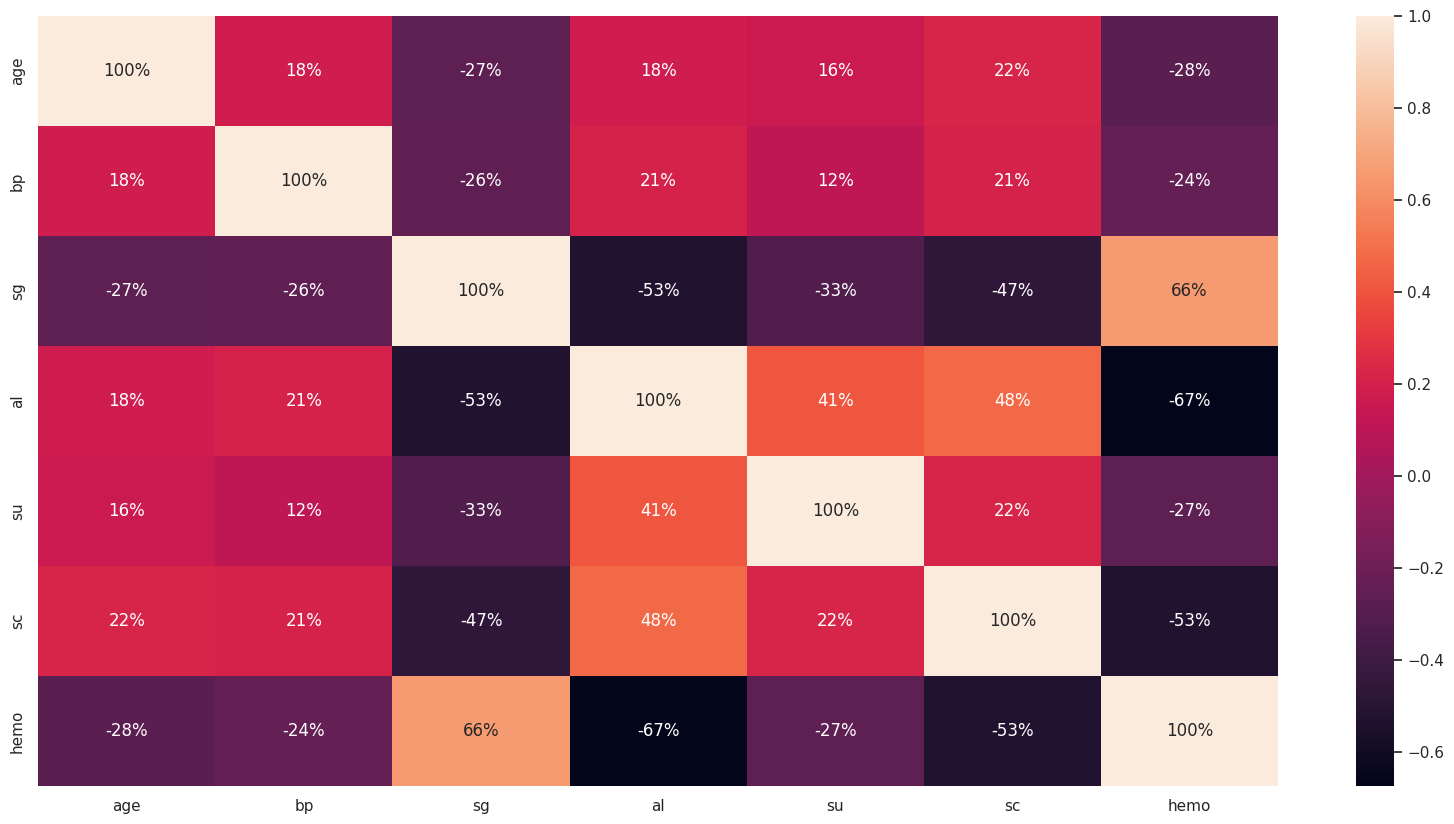

In [ ]:
# Before calling sns.heatmap, select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Plot the heatmap using the numerical data
plt.figure(figsize=(20, 10))
sns.heatmap(numerical_df.corr(), annot=True, fmt='.0%')

In [ ]:
print(retain)

['sg', 'age', 'bp', 'al', 'su', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']


In [ ]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [ ]:
#Split the data
x= df[['sg', 'al', 'sc', 'pcv', 'htn']]
y = df['classification']

In [ ]:
x

,sg,al,sc,pcv,htn
0,1.025,3.0,1.7,19,1
3,1.025,0.0,1.0,23,0
4,1.015,4.0,1.4,19,1
6,1.020,0.0,0.9,20,0
7,1.025,0.0,1.0,24,0
...,...,...,...,...,...
273,1.015,2.0,3.9,4,1
275,1.010,1.0,3.3,8,1
277,1.025,0.0,1.1,21,0
278,1.020,0.0,0.5,24,0


In [ ]:
y

,classification
0,0
3,1
4,0
6,1
7,1
...,...
273,0
275,0
277,1
278,1


In [ ]:
#Split the data into 80% training and 20% testing
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,random_state=42)


In [ ]:
print("---------------------------------------------------------")
print("Shape of training data: ", x_train.shape)
print("Shape of test data    : ", x_test.shape )
print("---------------------------------------------------------")

---------------------------------------------------------
Shape of training data:  (149, 5)
Shape of test data    :  (38, 5)
---------------------------------------------------------


In [ ]:
x_scaler = StandardScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.transform(x)

In [ ]:
x.shape[1]

5

In [ ]:
#Build The model

model = Sequential()
model.add(Dense(128, input_dim=len(x.columns),kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(64, kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(32, kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,139 (43.51 KB)

 Trainable params: 11,139 (43.51 KB)

 Non-trainable params: 0 (0.00 B)

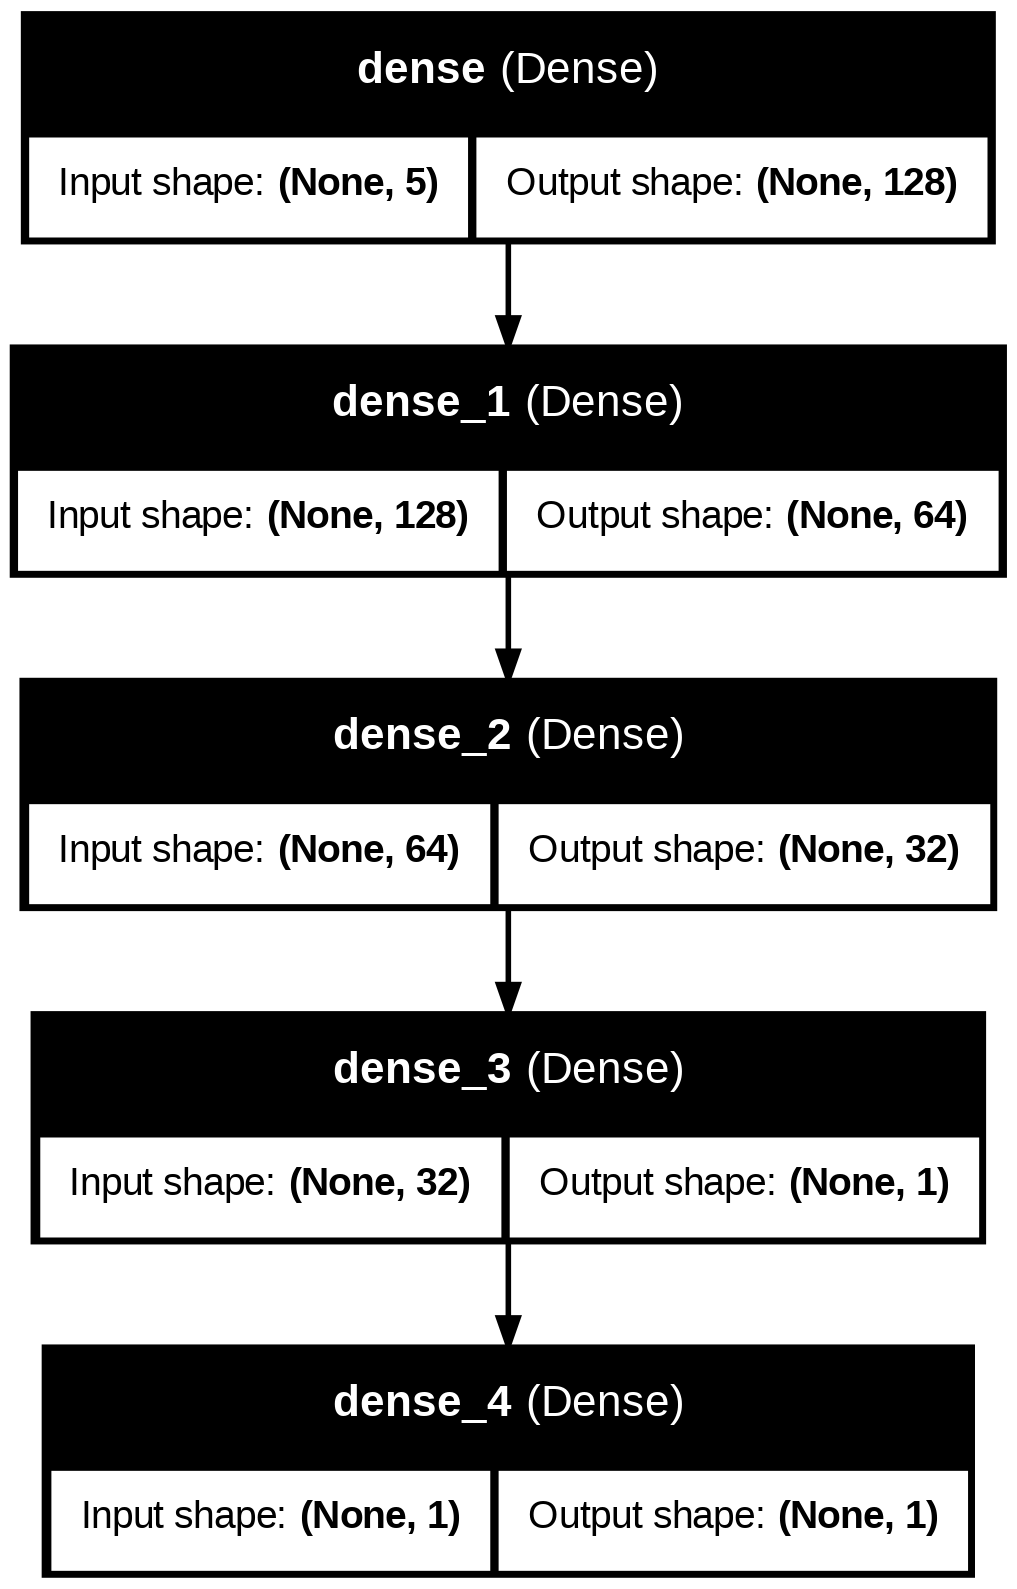

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 20,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.keras')

es = EarlyStopping(verbose=1, patience=20)

In [ ]:
history = model.fit(x=x_train, y=y_train, epochs=800, callbacks=[lrd, mcp, es],batch_size=256, validation_split=0.1)

Epoch 1/800
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4776 - loss: 0.6997 - val_accuracy: 0.3333 - val_loss: 0.7178 - learning_rate: 0.0010
Epoch 2/800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.4776 - loss: 0.6989 - val_accuracy: 0.3333 - val_loss: 0.7174 - learning_rate: 0.0010
Epoch 3/800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.4776 - loss: 0.6980 - val_accuracy: 0.3333 - val_loss: 0.7169 - learning_rate: 0.0010
Epoch 4/800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.4776 - loss: 0.6974 - val_accuracy: 0.3333 - val_loss: 0.7164 - learning_rate: 0.0010
Epoch 5/800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.4776 - loss: 0.6968 - val_accuracy: 0.3333 - val_loss: 0.7159 - learning_rate: 0.0010
Epoch 6/800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.4776 - loss: 0.6963 - val_accuracy: 0.3333 - val_loss: 0.7154 - learning_rate: 0.0010
Epoch 7/800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.4776 - loss: 0.6957 - val_accura

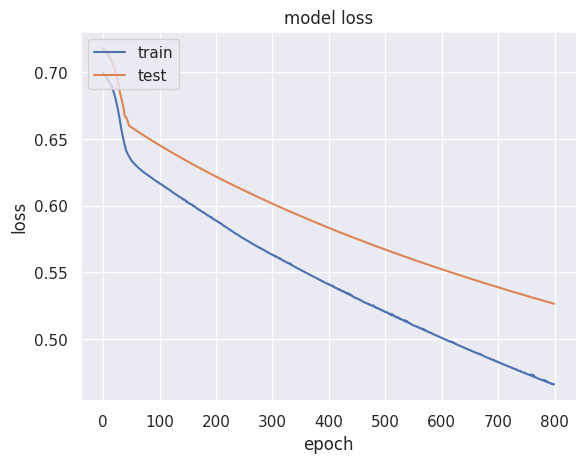

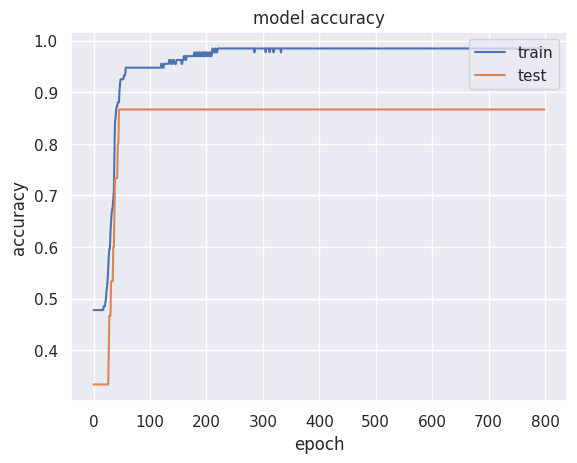

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

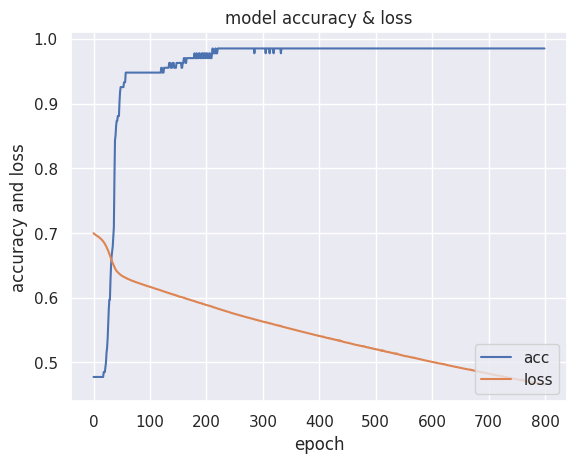

In [ ]:
#Visualize the models accuracy and loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [ ]:
for model_file in glob.glob('model.keras'):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(x_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(x_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()



  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print()
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("---------------------------------------------------------")
  print()

Model file:  model.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9720 - loss: 0.4734 

Original  : 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1

Predicted : 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1

Scores    : loss =  0.47253066301345825  acc =  0.9736841917037964
---------------------------------------------------------

